In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import sys

sys.path.append('..')

In [11]:
from src.algorithm import NaiveBayes, GaussianNaiveBayes
from src.metrics import *
from src.data_utils import *
from src.data_loaders import *
from src.validation_utils import TrainTestSplit
from pandas_ml import ConfusionMatrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split

In [14]:
abalone = AbaloneLoader()
splitter = TrainTestSplit(0.7, shuffle=False, stratified=False)

In [15]:
(train_x, train_y), (valid_x, valid_y) = splitter.split(abalone.data, abalone.target)

/home/kacper/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kacper/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Acc: 0.26076555023921366
Precision: 0.20741095807035784
Recall: 0.26076555023899295
F1: 0.23104804122091369


/home/kacper/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


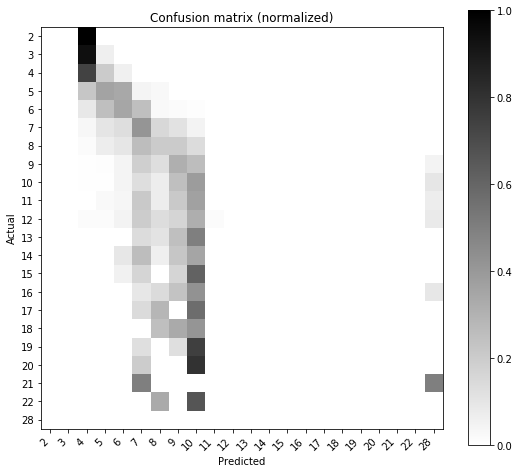

In [18]:
transformer = KMeans(6, list(range(1, 8)))
transformer.fit_params(train_x)
naive_bayes = NaiveBayes(digitization_method=transformer)
naive_bayes.fit(train_x, train_y)
y_pred = naive_bayes.predict(valid_x)
target = valid_y
matrix = ConfusionMatrix(target, y_pred)
print(f"Acc: {Accuracy()(y_pred, target)}")
print(f"Precision: {Precision()(y_pred, target)}")
print(f"Recall: {Recall()(y_pred, target)}")
print(f"F1: {F1()(y_pred, target)}")
matrix.plot(normalized=True)

Acc: 0.24242424242422309
Precision: 0.20649959922689973
Recall: 0.24242424242393545
F1: 0.22302450548488525


/home/kacper/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing
/home/kacper/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:115: RuntimeWarning: invalid value encountered in true_divide
  a = a.astype('float') / a.sum(axis=1)[:, np.newaxis]


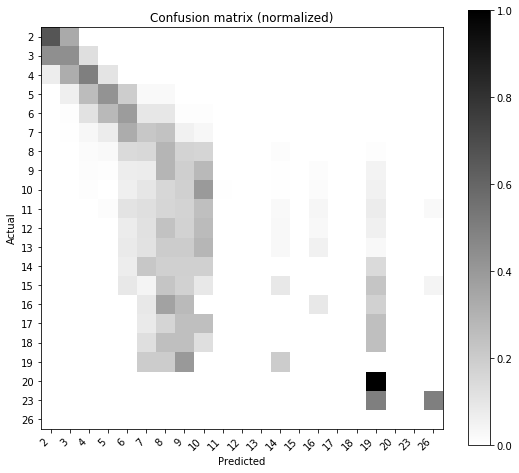

In [6]:
gaussian_bayes = GaussianNaiveBayes()
gaussian_bayes.fit(train_x, train_y)
y_pred = gaussian_bayes.predict(valid_x)
target = valid_y
matrix = ConfusionMatrix(target, y_pred)
print(f"Acc: {Accuracy()(y_pred, target)}")
print(f"Precision: {Precision()(y_pred, target)}")
print(f"Recall: {Recall()(y_pred, target)}")
print(f"F1: {F1()(y_pred, target)}")
matrix.plot(normalized=True)

# SKLEARN

In [7]:
abalone = AbaloneLoader()
train_x, valid_x, train_y, valid_y = train_test_split(abalone.data, abalone.target, train_size=0.7, shuffle=False)

/home/kacper/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Acc: 0.24242424242422309
Precision: 0.20649959922689973
Recall: 0.24242424242393545
F1: 0.22302450548488525


/home/kacper/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing
/home/kacper/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:115: RuntimeWarning: invalid value encountered in true_divide
  a = a.astype('float') / a.sum(axis=1)[:, np.newaxis]


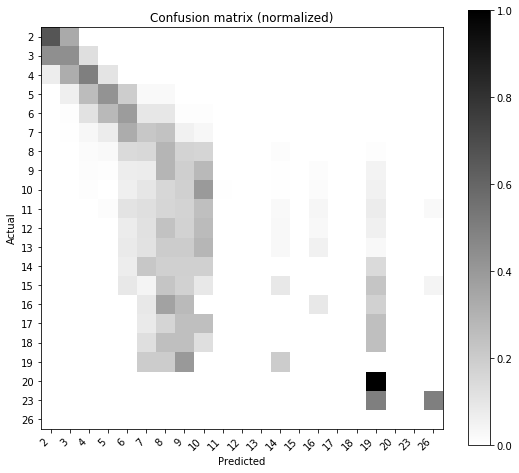

In [8]:
gaussian_naive_bayes = GaussianNB()
gaussian_naive_bayes.fit(train_x, train_y)
y_pred = gaussian_naive_bayes.predict(valid_x)
target = valid_y
matrix = ConfusionMatrix(target, y_pred)
print(f"Acc: {Accuracy()(y_pred, target)}")
print(f"Precision: {Precision()(y_pred, target)}")
print(f"Recall: {Recall()(y_pred, target)}")
print(f"F1: {F1()(y_pred, target)}")
matrix.plot(normalized=True)

Acc: 0.2759170653907276
Precision: 0.21000371240112214
Recall: 0.2759170653905041
F1: 0.23848993779702937


/home/kacper/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


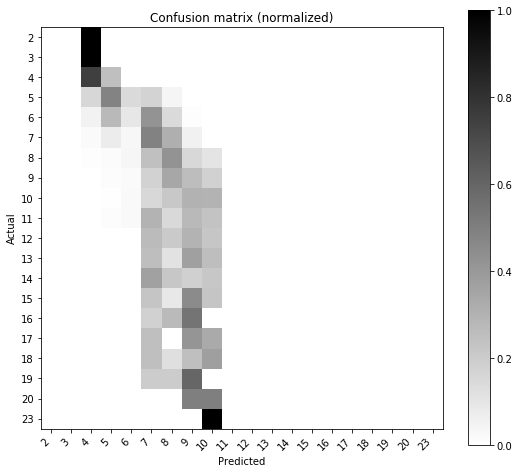

In [9]:
naive_bayes = BernoulliNB(binarize=0.31)
naive_bayes.fit(train_x, train_y)
y_pred = naive_bayes.predict(valid_x)
target = valid_y
matrix = ConfusionMatrix(target, y_pred)
print(f"Acc: {Accuracy()(y_pred, target)}")
print(f"Precision: {Precision()(y_pred, target)}")
print(f"Recall: {Recall()(y_pred, target)}")
print(f"F1: {F1()(y_pred, target)}")
matrix.plot(normalized=True)